In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [13]:
df = pd.read_csv("data/card_transdata.csv")

#Data transform

df['distance_from_home'] = (df['distance_from_home'] - np.mean(df['distance_from_home']))/np.std(df['distance_from_home'])
df['distance_from_last_transaction'] = (df['distance_from_last_transaction'] - np.mean(df['distance_from_last_transaction']))/np.std(df['distance_from_last_transaction'])
df['ratio_to_median_purchase_price'] = (df['ratio_to_median_purchase_price'] - np.mean(df['ratio_to_median_purchase_price']))/np.std(df['ratio_to_median_purchase_price'])

print(*df.columns.values)

#split to legit and fraud frames
legit, fraud = [x for _, x in df.groupby(df['fraud'] == 1)]

distance_from_home distance_from_last_transaction ratio_to_median_purchase_price repeat_retailer used_chip used_pin_number online_order fraud


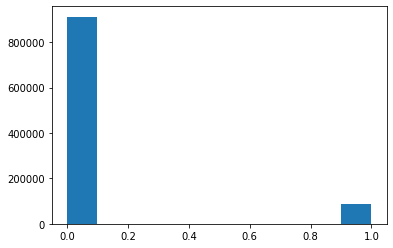

In [9]:
plt.hist(df['fraud'])
plt.show()

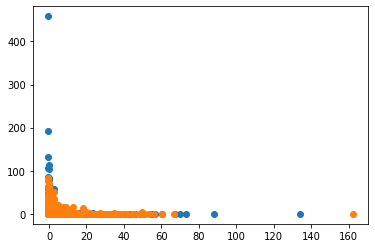

In [14]:
plt.scatter(legit['distance_from_home'], legit['distance_from_last_transaction'])
plt.scatter(fraud['distance_from_home'], fraud['distance_from_last_transaction'])
plt.show()

In [20]:
#PC transform data
n_comp = 7
pca = PCA(n_components=n_comp)
pca.fit(df.loc[:, df.columns != 'fraud'])



PCA(n_components=7)